In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


In [14]:
results.isna().sum().sum()

0

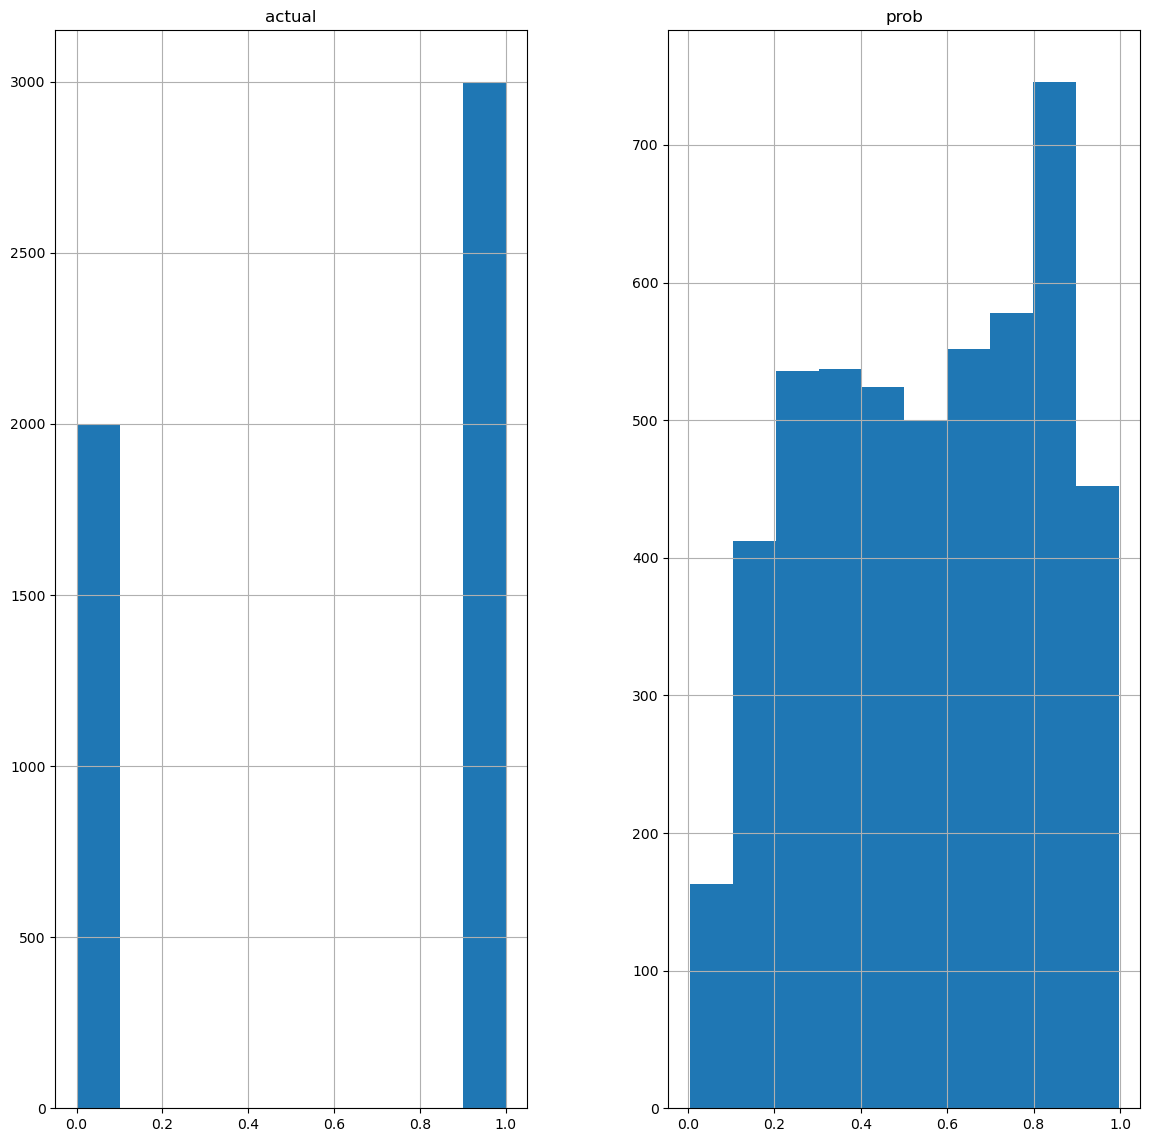

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

results.hist(figsize=(14,14))
plt.show()

* The test set should not be over-sampled. The testing procedure should be as objective as possible. The procedure would lose objectivity if you generated new test set data and evaluated your model on them.

In [31]:
df1 = results[results['actual'] <= 0.0]
df1

,actual,prob
0,0.0,0.380052
5,0.0,0.691434
12,0.0,0.206604
16,0.0,0.142531
17,0.0,0.545210
...,...,...
4991,0.0,0.312417
4993,0.0,0.418233
4994,0.0,0.336559
4995,0.0,0.109184


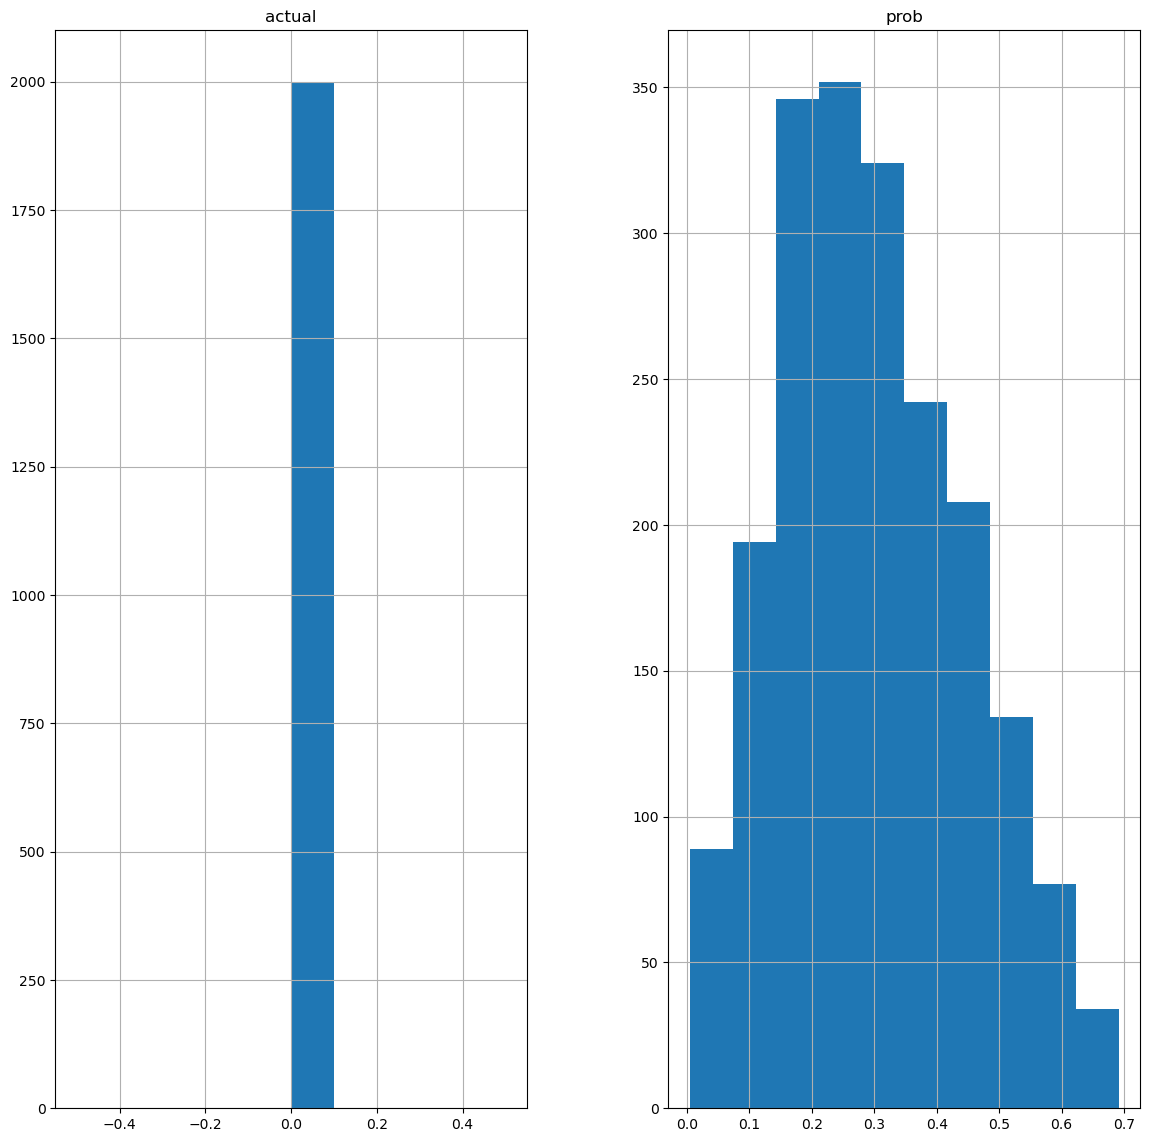

In [28]:
df1.hist(figsize=(14,14))
plt.show()

In [27]:
df2 = results[results['actual'] >= 0.1]
df2

,actual,prob
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988
6,1.0,0.870590
...,...,...
4990,1.0,0.543970
4992,1.0,0.879744
4996,1.0,0.920730
4997,1.0,0.899630


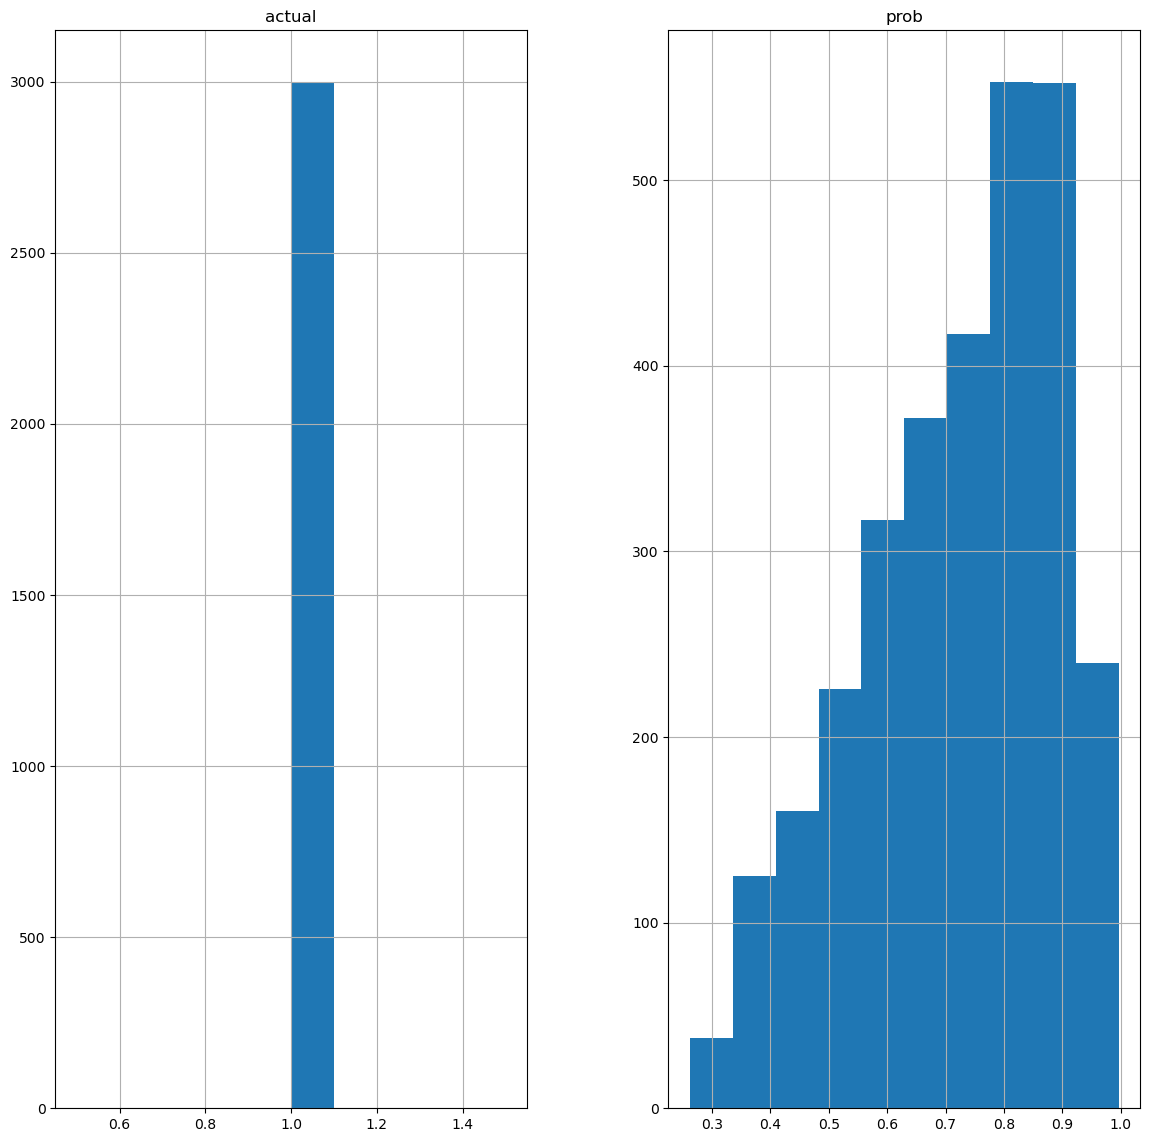

In [29]:
df2.hist(figsize=(14,14))
plt.show()

* In some cases, probability is less than 0.5 and it's showing as True and vice-versa.

In [37]:
results['pred'] = [0.0 if x <=0.5 else 1.0 for x in results['prob']]
results

,actual,prob,pred
0,0.0,0.380052,0.0
1,1.0,0.827923,1.0
2,1.0,0.929093,1.0
3,1.0,0.472508,0.0
4,1.0,0.906988,1.0
...,...,...,...
4995,0.0,0.109184,0.0
4996,1.0,0.920730,1.0
4997,1.0,0.899630,1.0
4998,0.0,0.198838,0.0


In [39]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(results['actual'], results['pred'])
confusion_matrix

array([[1790,  210],
       [ 377, 2623]])

* Here the true positive rate is a bit higher than true negative rate.

In [40]:
TP=confusion_matrix[0][0]
TN=confusion_matrix[1][1]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]

In [41]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
accuracy

0.8826

In [42]:
Precesion=TP/(FP+TP)
Precesion

0.895

In [44]:
Recall=TP/(FN+TP)
Recall

0.8260267651130595

* I will go with the positive predicted value(Precesion), where 1790 corrected out of 2000.

In [48]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = results['actual']
y_probas = results['pred']
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [1]:
 roc_auc = metrics.auc(results['actual'], results['pred'])
    plt.title('Receiver Operating Characteristic')
    plt.plot(results['actual'], results['pred'], 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

IndentationError: unexpected indent (1566135236.py, line 2)